In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:
# Read in the data
df = pd.read_csv('../Data/data_clean.csv',
                 parse_dates=['Date', 'Date of Birth'],
                 delimiter=';',
                 )

df['Gender'] = pd.Categorical(df['Gender'], categories=["Men", "Women"], ordered=True)
df = df.sort_values('Gender')

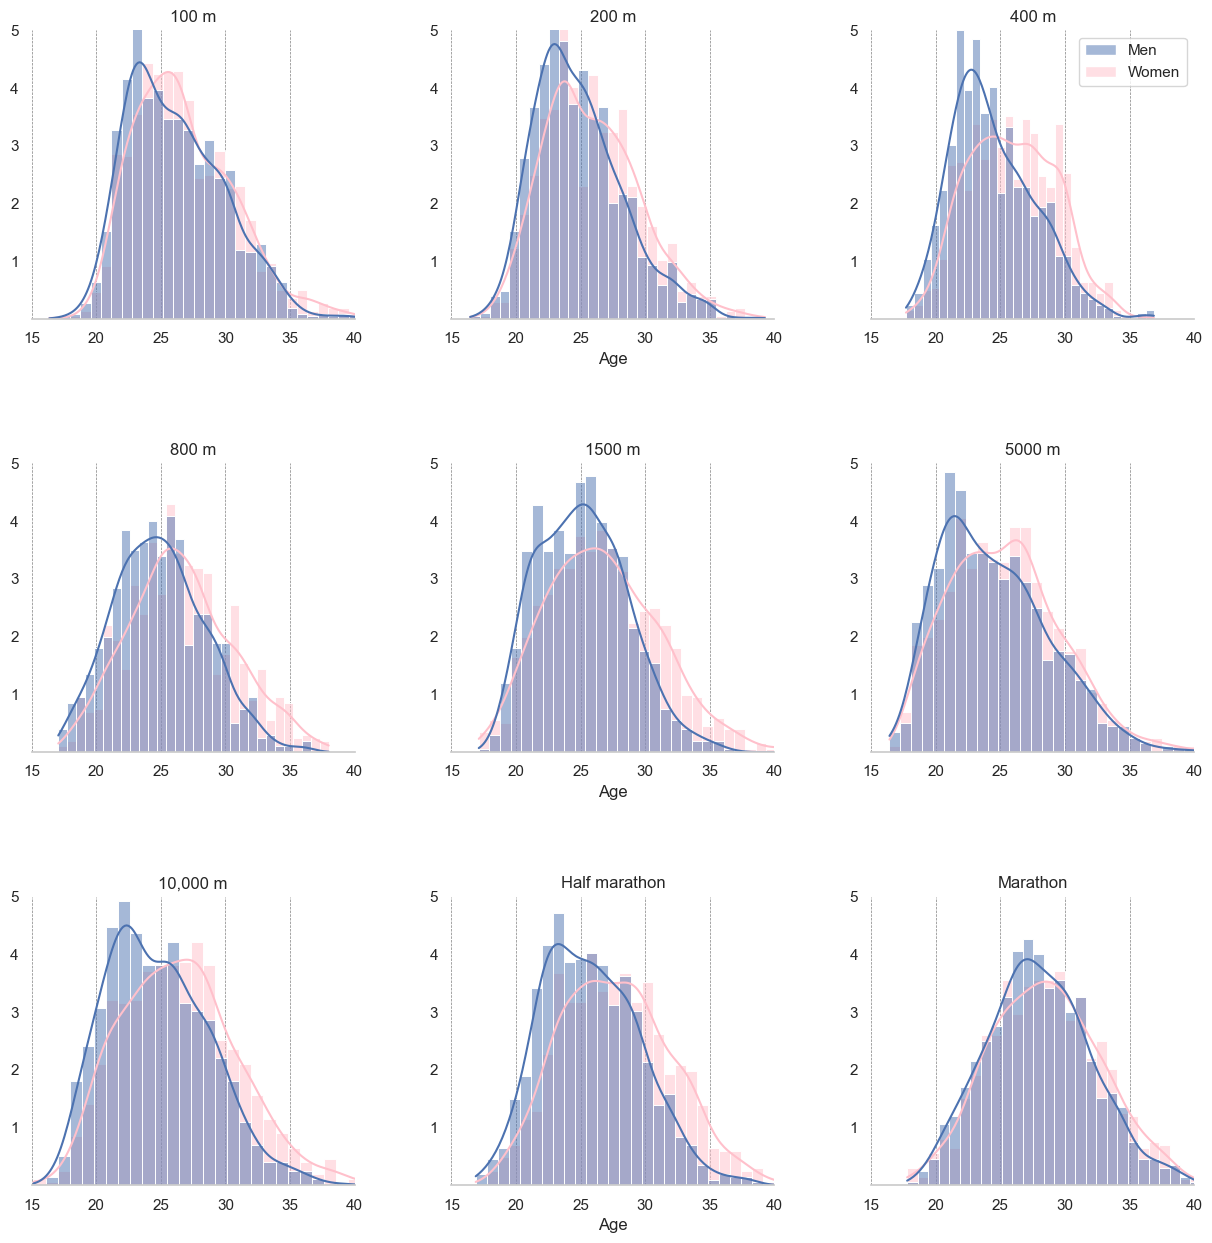

In [4]:
# List all unique events in the df
unique_events = df['Event'].unique()

# Set the style for the plots
sns.set(style="whitegrid")


# Filter and sort the events based on Olympic distances and half marathon
sorted_events = ['100 m', '200 m', '400 m', '800 m', '1500 m', '5000 m', '10,000 m', 'Half marathon', 'Marathon']

# Determine the number of rows and columns for the subplots
n = len(sorted_events)
ncols = 3  # Number of columns
nrows = math.ceil(n / ncols)  # Number of rows

# Create a figure and axes objects
fig, axes = plt.subplots(nrows, ncols, figsize=(15, nrows * 5))
fig.subplots_adjust(wspace=0.3, hspace=0.5)


# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create subplots
for idx, event in enumerate(sorted_events):
    ax = axes[idx]
    sns.histplot(data=df[df['Event'] == event], x='Age', hue='Gender', bins=30, kde=True, stat='percent', palette={"Men": "b", "Women": "pink"}, ax=ax)
    ax.set_title(f'{event}')
    if idx in [1, 4, 7]:
        ax.set_xlabel('Age')
    else:
        ax.set_xlabel('')
    ax.set_ylabel('')
    
    ax.set_xticks([15, 20, 25, 30, 35, 40])
    ax.set_xlim([15, 40])
    ax.set_yticks([1, 2, 3, 4, 5])
    ax.set_ylim([0, 5])
    
    if idx % ncols != 0:
        ax.set_ylabel('')    
    
    # Remove spines
    sns.despine(left=True, top=True, right=True, ax=ax)
    ax.yaxis.set_ticks_position('none')
    
    # Remove horizontal grid lines
    ax.yaxis.grid(False)
    
    # Remove the legend for all but the plot in the first row rightmost column
    if idx != 2:
        ax.get_legend().remove()
    # Remove the legend title
    if ax.get_legend() is not None:
        ax.get_legend().set_title('')
        
    # Add subtle vertical grid
    ax.xaxis.grid(True, linestyle='--', linewidth=0.5, color='grey')

# Remove extra subplots if any
for idx in range(len(sorted_events), len(axes)):
    fig.delaxes(axes[idx])

plt.savefig('../Exports/athletics_age_distribution.png',
            format='png', dpi=300, bbox_inches='tight')

plt.show()



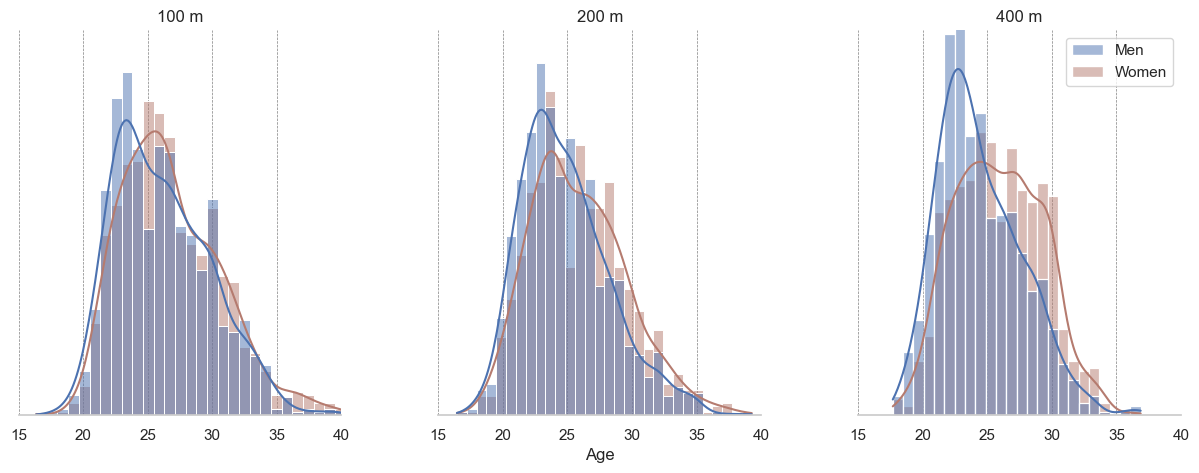

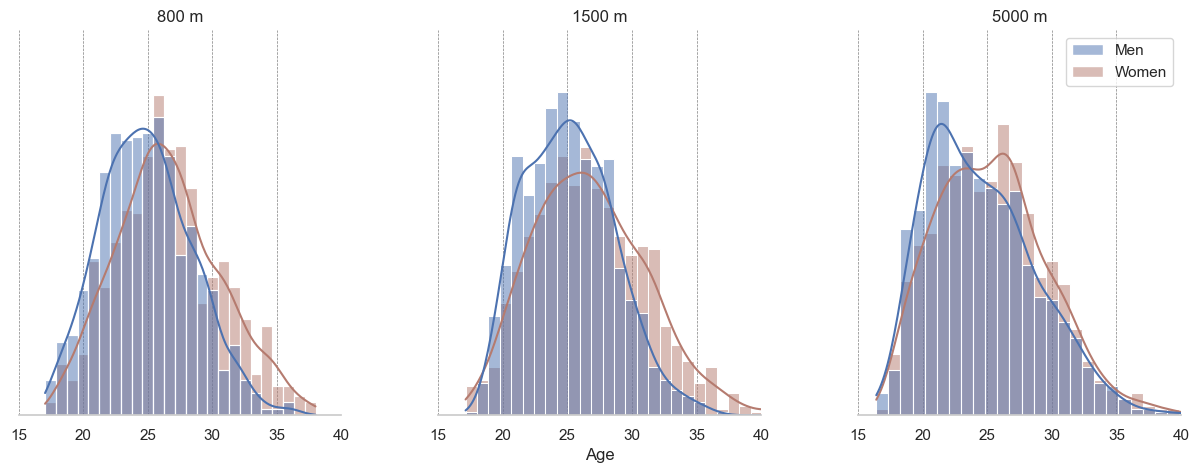

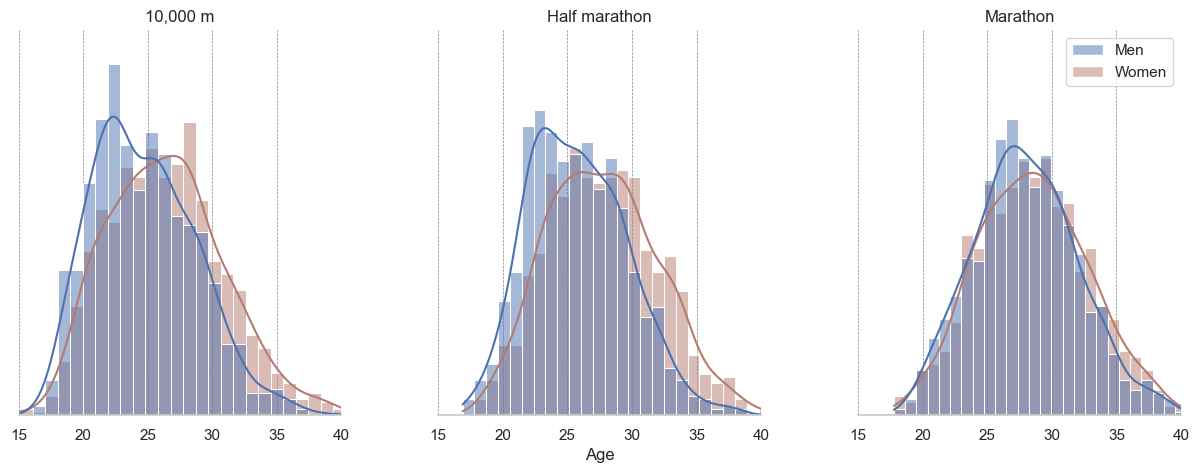

In [6]:

import math
import seaborn as sns
import matplotlib.pyplot as plt


def create_and_save_plot(events, file_name):
    nrows = math.ceil(len(events) / ncols)
    fig, axes = plt.subplots(nrows, ncols, figsize=(15, nrows * 5))
    fig.subplots_adjust(wspace=0.3, hspace=0.5)
    axes = axes.flatten()

    for idx, event in enumerate(events):
        ax = axes[idx]
        sns.histplot(data=df[df['Event'] == event], x='Age', hue='Gender',
                     kde=True, stat='percent', palette={"Men": "b", "Women": "#B57B6F"}, ax=ax)
        ax.set_title(f'{event}')
        ax.set_xlabel('Age' if idx in [1, 4, 7] else '')
        ax.set_ylabel('')
        ax.set_xticks([15, 20, 25, 30, 35, 40])
        ax.set_xlim([15, 40])
        ax.set_yticks([1, 2, 3, 4, 5])
        ax.set_yticklabels([])
        ax.set_ylim([0, 6])
        if idx % ncols != 0:
            ax.set_ylabel('')
        sns.despine(left=True, top=True, right=True, ax=ax)
        ax.yaxis.set_ticks_position('none')
        ax.yaxis.grid(False)
        if idx != 2:
            ax.get_legend().remove()
        if ax.get_legend() is not None:
            ax.get_legend().set_title('')
        ax.xaxis.grid(True, linestyle='--', linewidth=0.5, color='grey')

    for idx in range(len(events), len(axes)):
        fig.delaxes(axes[idx])

    plt.savefig(f'../Exports/{file_name}.png',
                    format='png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close(fig)


# Set the style for the plots
sns.set(style="whitegrid")

# Grouping the events
group1 = ['100 m', '200 m', '400 m']
group2 = ['800 m', '1500 m', '5000 m']
group3 = ['10,000 m', 'Half marathon', 'Marathon']

ncols = 3  # Number of columns

# Create and save plots for each group
create_and_save_plot(group1, 'sprint_events')
create_and_save_plot(group2, 'middle_distance_events')
create_and_save_plot(group3, 'long_distance_events')

In [ ]:
average_ages = df.groupby(['Event', 'Gender'])['Age'].mean().reset_index()

print(average_ages)


            Event Gender        Age
0        10,000 m    Men  24.752994
1        10,000 m  Women  26.430647
2           100 m    Men  26.128668
3           100 m  Women  26.757051
4          1500 m    Men  25.171129
5          1500 m  Women  26.739885
6           200 m    Men  24.847080
7           200 m  Women  25.852969
8           400 m    Men  24.458076
9           400 m  Women  25.895918
10         5000 m    Men  24.509838
11         5000 m  Women  25.320879
12          800 m    Men  24.913756
13          800 m  Women  26.570803
14  Half marathon    Men  25.787448
15  Half marathon  Women  27.747408
16       Marathon    Men  27.995247
17       Marathon  Women  28.532332


C:\Users\Jonas\AppData\Local\Temp\ipykernel_25932\2346913487.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_ages = df.groupby(['Event', 'Gender'])['Age'].mean().reset_index()


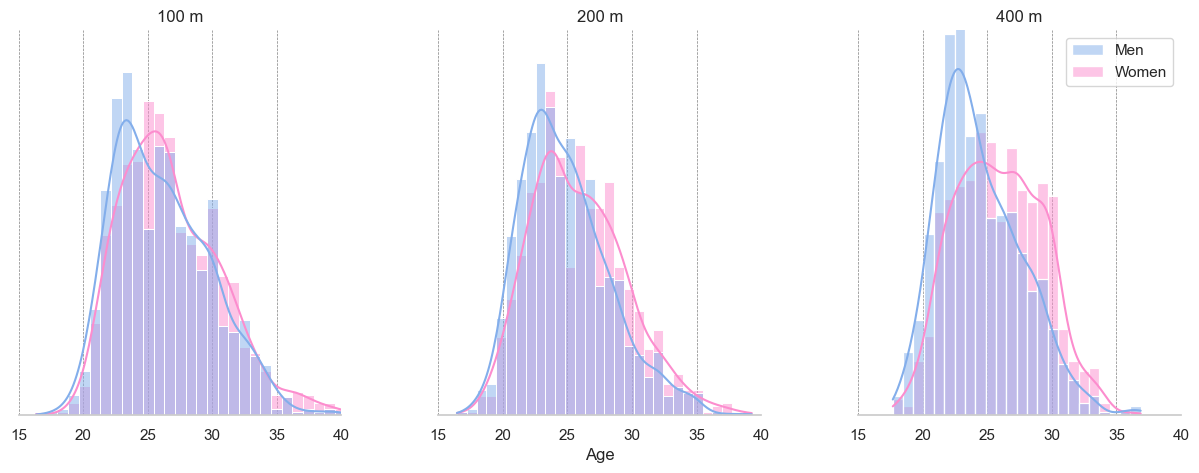

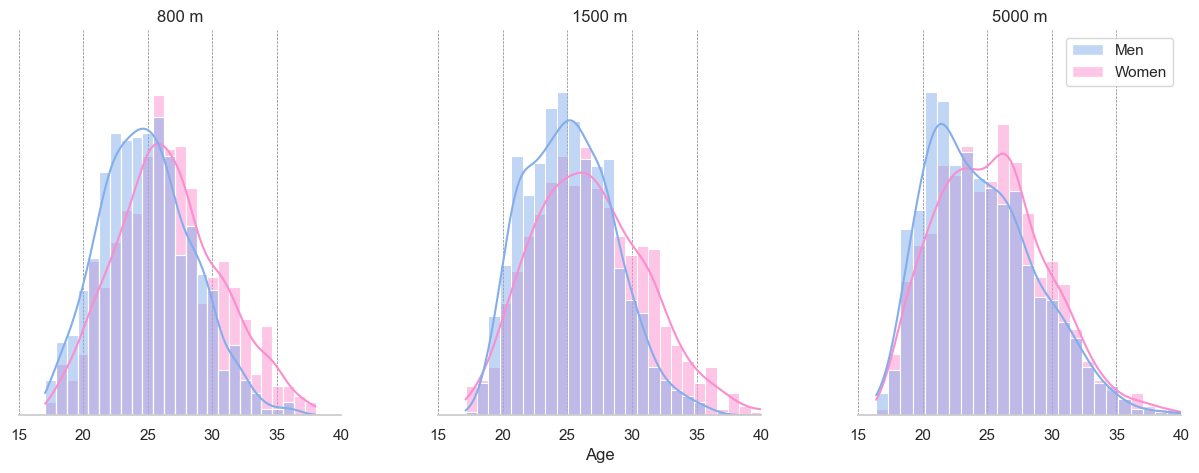

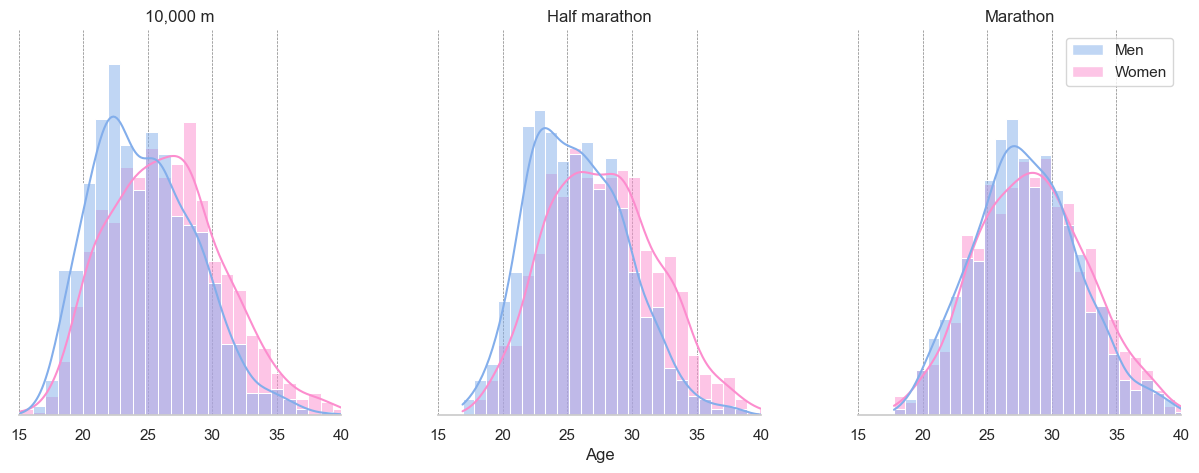

In [8]:

import math
import seaborn as sns
import matplotlib.pyplot as plt


def create_and_save_plot(events, file_name):
    nrows = math.ceil(len(events) / ncols)
    fig, axes = plt.subplots(nrows, ncols, figsize=(15, nrows * 5))
    fig.subplots_adjust(wspace=0.3, hspace=0.5)
    axes = axes.flatten()

    for idx, event in enumerate(events):
        ax = axes[idx]
        sns.histplot(data=df[df['Event'] == event], x='Age', hue='Gender',
                     kde=True, stat='percent', palette={"Men": "#83aeeb", "Women": "#fc8dce"}, ax=ax)
        ax.set_title(f'{event}')
        ax.set_xlabel('Age' if idx in [1, 4, 7] else '')
        ax.set_ylabel('')
        ax.set_xticks([15, 20, 25, 30, 35, 40])
        ax.set_xlim([15, 40])
        ax.set_yticks([1, 2, 3, 4, 5])
        ax.set_yticklabels([])
        ax.set_ylim([0, 6])
        if idx % ncols != 0:
            ax.set_ylabel('')
        sns.despine(left=True, top=True, right=True, ax=ax)
        ax.yaxis.set_ticks_position('none')
        ax.yaxis.grid(False)
        if idx != 2:
            ax.get_legend().remove()
        if ax.get_legend() is not None:
            ax.get_legend().set_title('')
        ax.xaxis.grid(True, linestyle='--', linewidth=0.5, color='grey')

    for idx in range(len(events), len(axes)):
        fig.delaxes(axes[idx])

    plt.savefig(f'../Exports/{file_name}.png',
                format='png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close(fig)


# Set the style for the plots
sns.set(style="whitegrid")

# Grouping the events
group1 = ['100 m', '200 m', '400 m']
group2 = ['800 m', '1500 m', '5000 m']
group3 = ['10,000 m', 'Half marathon', 'Marathon']

ncols = 3  # Number of columns

# Create and save plots for each group
create_and_save_plot(group1, 'sprint_events')
create_and_save_plot(group2, 'middle_distance_events')
create_and_save_plot(group3, 'long_distance_events')